In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
sales_df = pd.read_csv(r'C:\Users\AA\DataScience\datasets\advertising_and_sales_clean.csv')
sales_df

tv     radio  social_media influencer      sales
0     16000.0   6566.23       2907.98       Mega   54732.76
1     13000.0   9237.76       2409.57       Mega   46677.90
2     41000.0  15886.45       2913.41       Mega  150177.83
3     83000.0  30020.03       6922.30       Mega  298246.34
4     15000.0   8437.41       1406.00      Micro   56594.18
...       ...       ...           ...        ...        ...
4541  26000.0   4472.36        717.09      Micro   94685.87
4542  71000.0  20610.69       6545.57       Nano  249101.92
4543  44000.0  19800.07       5096.19      Micro  163631.46
4544  71000.0  17534.64       1940.87      Macro  253610.41
4545  42000.0  15966.69       5046.55      Micro  148202.41

[4546 rows x 5 columns]

In [3]:
sales_df = sales_df.drop('influencer', axis=1)
sales_df.head()

tv     radio  social_media      sales
0  16000.0   6566.23       2907.98   54732.76
1  13000.0   9237.76       2409.57   46677.90
2  41000.0  15886.45       2913.41  150177.83
3  83000.0  30020.03       6922.30  298246.34
4  15000.0   8437.41       1406.00   56594.18

In [4]:
#creating feature and target data
X_feature = sales_df['tv'].values.reshape(-1,1)
y_target = sales_df['sales'].values


In [5]:
#instantiate model
reg = LinearRegression()

In [6]:
#fit the model
reg.fit(X_feature,y_target)
 
#predict
prediction = reg.predict(X_feature)
print(prediction)

[ 56851.73298719  46167.19070729 145889.58531972 ... 156574.12759962
 252735.00811874 149451.09941302]


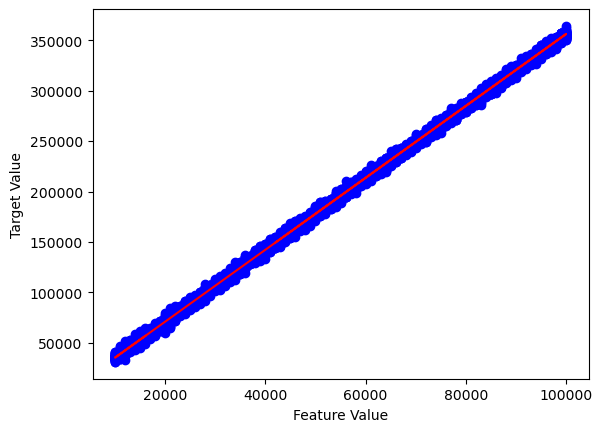

In [7]:
#plot the model
plt.scatter(X_feature,y_target,color = 'blue')
plt.plot(X_feature,prediction,color='red')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.show()

# Linear Regression using all features:

In [8]:
#import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#create features and target array

X_feature = sales_df.drop('sales',axis =1).values
y_target = sales_df['sales'].values

#training and test set
X_feature_train,X_feature_test,y_target_train,y_target_test = train_test_split(X_feature,y_target,test_size = 0.3,random_state=50)

#model
reg=LinearRegression()

#fit the model
reg.fit(X_feature_train,y_target_train)

#predict

y_predict = reg.predict(X_feature_test)
print('Predictions:{}, Actual Values:{}'. format(y_predict[:2],y_target_test[:2]))


Predictions:[266959.43642708 120957.03262184], Actual Values:[267044.34 130342.02]


In [9]:
#compute the model performances i.e errors
from sklearn.metrics import mean_squared_error

#r_squared
r_squared = reg.score(X_feature_test,y_target_test)

#RMSE
rmse = mean_squared_error(y_target_test, y_predict, squared = False)

print('R^2:{}'.format(r_squared))
print('RMSE:{}'.format(rmse))


R^2:0.9990275019035635
RMSE:2959.2153431175875


# Cross Validation

In [11]:
#importing cross fold
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle = True, random_state =42 )

reg = LinearRegression()

cv_results = cross_val_score(reg,X_feature,y_target, cv=kf)

print(cv_results)

print(np.mean(cv_results), np.std(cv_results))


[0.99900913 0.99898729 0.99897163 0.99898887 0.99893043 0.99905966]
0.9989911695584723 3.895599514495595e-05


# Regularized Regression

In [12]:
#ridge regression

from sklearn.linear_model import Ridge

scores=[]

for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_feature_train,y_target_train)
    y_pred = ridge.predict(X_feature_test)
    
    scores.append(ridge.score(X_feature,y_target))
print(scores)    


[0.99899467119571, 0.9989946711957104, 0.9989946711957154, 0.9989946711957649, 0.9989946711962597]


[ 3.56256962 -0.00397037  0.00496392]


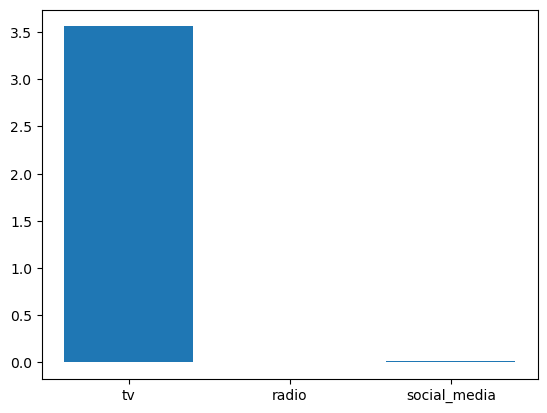

In [13]:
#lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_feature,y_target)

lasso_coef = lasso.fit(X_feature,y_target).coef_

print(lasso_coef)

sales_columns = sales_df.drop('sales',axis=1).columns

plt.bar(sales_columns, lasso_coef)
plt.show()

Hence tv is most important feature for sales value than other features.